In [2]:
pip install openeo --upgrade

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 6.9 MB/s  0:00:00

   ------ --------------------------------- 1/6 [oschmod]
   ------ --------------------------------- 1/6 [oschmod]
   ------------- -------------------------- 2/6 [pystac]
   ------------- -------------------------- 2/6 [pystac]
   ------------- -------------------------- 2/6 [pystac]
   ------------- -------------------------- 2/6 [pystac]
   ------------- -------------------------- 2/6 [pystac]
   -------------------- ------------------- 3/6 [deprecated]
   -------------------------- ------------- 4/6 [xarray]
   -------------------------- ------------- 4/6 [xarray]
   -------------------------- ------------- 4/6 [xarray]
   -------------------------- ------------- 4/6 [xarray]
   -------------------------- ------------- 4/6 [xarray]
   -------------------------- ------------- 4/6 [xarray]
   -------------------------- ------------- 4/6 [xarr

In [3]:
pip install xarray --upgrade

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------ --------- 1.0/1.4 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 10.0 MB/s  0:00:00

  Attempting uninstall: packaging

    Found existing installation: packaging 23.2

    Uninstalling packaging-23.2:

      Successfully uninstalled packaging-23.2

   ---------------------------------------- 0/2 [packaging]
  Attempting uninstall: xarray
   ---------------------------------------- 0/2 [packaging]
   -------------------- ------------------- 1/2 [xarray]
    Found existing installation: xarray 2025.1.1
   -------------------- ------------------- 1/2 [xarray]
    Uninstalling xarray-2025.1.1:
   -------------------- ------------------- 1/2 [xarray]
      Successfully uninstalled xarray-2025.1.1
   -------------------- ------------------- 1/2 [xarray]
   -------------------- ------------------- 1/2 [xarray]
   -------------------- ------------------- 1/2 [

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
openeo 0.45.0 requires xarray<2025.01.2,>=0.12.3, but you have xarray 2025.10.1 which is incompatible.


In [2]:
pip install dask

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 15.6 MB/s  0:00:00

   -------------------- ------------------- 2/4 [partd]
   ------------------------------ --------- 3/4 [dask]
   ------------------------------ --------- 3/4 [dask]
   ------------------------------ --------- 3/4 [dask]
   ------------------------------ --------- 3/4 [dask]
   ------------------------------ --------- 3/4 [dask]
   ------------------------------ --------- 3/4 [dask]
   ------------------------------ --------- 3/4 [dask]
   ------------------------------ --------- 3/4 [dask]
   ------------------------------ --------- 3/4 [dask]
   ------------------------------ --------- 3/4 [dask]
   ------------------------------ --------- 3/4 [dask]
   ------------------------------ --------- 3/4 [dask]
   ------------------------------ --------- 3/4 [dask]
   ------------------------------ --------- 3/4 [dask]
   ---------------------------

In [42]:
pip install netCDF4 h5netcdf

   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 2.9/2.9 MB 27.8 MB/s  0:00:00

   ---------------------------------------- 0/2 [h5py]
   ---------------------------------------- 0/2 [h5py]
   ---------------------------------------- 0/2 [h5py]
   ---------------------------------------- 0/2 [h5py]
   ---------------------------------------- 0/2 [h5py]
   ---------------------------------------- 0/2 [h5py]
   -------------------- ------------------- 1/2 [h5netcdf]
   ---------------------------------------- 2/2 [h5netcdf]

Note: you may need to restart the kernel to use updated packages.


In [1]:
#imports
import pandas as pd
import os
import glob

import openeo
from openeo.extra import spectral_indices
import xarray
import netCDF4
import dask
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import pyproj
from shapely.geometry import Point
from shapely.ops import transform

#from torch.utils.data import DataLoader, Dataset
from xarray import Dataset

C:\Users\Ulli\AppData\Local\Temp\ipykernel_31624\426243387.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 1. Data Loading

In [2]:
def create_bbox_from_radius(lon, lat, radius_meters):
    """
    Creates a bounding box from a center point (lon, lat) and a radius in meters.
    """
    # Define the projections: WGS84 (lat/lon) and a metric projection (Mercator)
    wgs84 = pyproj.CRS("EPSG:4326")
    mercator = pyproj.CRS("EPSG:3857")

    # Create a transformer to switch between projections
    project_to_mercator = pyproj.Transformer.from_crs(wgs84, mercator, always_xy=True).transform
    project_to_wgs84 = pyproj.Transformer.from_crs(mercator, wgs84, always_xy=True).transform

    # Define a point and project it into the metric system
    point_wgs84 = Point(lon, lat)
    point_mercator = transform(project_to_mercator, point_wgs84)

    # Create a buffer (circle) around the metric point
    buffer_mercator = point_mercator.buffer(radius_meters)

    # Project the buffer back to WGS84
    buffer_wgs84 = transform(project_to_wgs84, buffer_mercator)
    
    # Return the bounds of the buffer
    return buffer_wgs84.bounds

In [3]:
path_root = ("./data/")

In [ ]:
class Dataset_Sen2():
    '''Dataset Loading - Loads the dataset and the corresponding Sentinel-2 images from Copernicus.
       Filter for a specific river and a limited number of points for testing.
       Filter for only images with water pixels.

    Returns:
        ds: xarray datacube containing the Sentinel-2 images.
    '''

    def __init__(self, path_root):
        self.root = path_root # Root path where the dataset is located
        self.path_sentinel2 = os.path.join(self.root, "sentinel2/")
        #read dataset
        self.dataframe = pd.read_csv(os.path.join(self.root, "HyG_20240220.csv"), sep=",",  encoding='utf-8')
        #filter dataset
        self.dataframe = self.dataframe[self.dataframe['NAME'] == 'Missouri-Marias']
        self.dataframe = self.dataframe.reset_index(drop=True)
        self.dataframe = self.dataframe.head(2) #limit to first 20 entries for testing

        #get the IDs of the points in the river
        self.IDs = self.dataframe['Gage_ID'].to_list()
        #get the longitude and latitude of the specific river point from the dataset
        self.lat = self.dataframe['lat_degN'].to_list()
        self.lon = self.dataframe['lon_degE'].to_list()
        #define a radius for defining the bounding box around the specific point
        radius = 5000
        # calculate bounding boxes for each point and store them in a dictionary
        bbox_keys = ("west", "south", "east", "north")
        self.bboxes_dict = {
            id:
                dict(zip(bbox_keys, create_bbox_from_radius(self.lon, self.lat, radius)))
                for id, self.lon, self.lat in zip(self.IDs, self.lon, self.lat)
        }
        
        #get connection to Copernicus API
        self.connection = openeo.connect("openeofed.dataspace.copernicus.eu").authenticate_oidc()

        #load the datacube with Sentinel-2 data from API and download it
        for i, bbox in enumerate(self.bboxes_dict.values()):
            print(f"Loading datacube for ID: {str(self.IDs[i])} with bbox: {str(bbox)}")
            self.datacube = self.connection.load_collection(
            "SENTINEL2_L2A",
            temporal_extent=("2024-05-01", "2024-05-05"),
            spatial_extent={
                "west": bbox["west"],
                "south": bbox["south"],
                "east": bbox["east"],
                "north": bbox["north"],
                "crs": "EPSG:4326",
            },
            bands=["B04", "B11", "B03", "B02", "SCL"],
            max_cloud_cover=50,
        )
            
            #compute MNDWI index
            indices_cube = spectral_indices.compute_index(self.datacube, 'MNDWI')
            #print(self.indices)

            # Merge the original cube and the indices cube
            merged_cube = self.datacube.merge_cubes(indices_cube)

            #download the datacube
            out_filename = f"sentinel2_{self.IDs[i]}.nc"
            if not os.path.exists(self.path_sentinel2, out_filename):
                merged_cube.download(os.path.join(self.path_sentinel2, out_filename))

    def __getitem__(self, idx):
        # Get the ID for the requested index
        gage_id = self.IDs[idx]
        # Construct the corresponding filename
        filename = f"sentinel2_{gage_id}.nc"
        filepath = os.path.join(self.path_sentinel2, filename)
        
        # Open the NetCDF file as an xarray.Dataset
        ds = xarray.open_dataset(filepath)
        # Get the corresponding bounding box
        bbox = self.bboxes_dict[gage_id]

        # Return the dataset, bbox, and ID
        return ds, bbox, gage_id
    def __len__(self):
        # return the length of the dataset
        return len(self.dataframe)
    
sen2_dataset = Dataset_Sen2(path_root)

Authenticated using refresh token.
Loading datacube for ID: 6054500 with bbox: {'west': -111.46521576420595, 'south': 46.11547286400523, 'east': -111.375384235794, 'north': 46.17770954473375}
Loading datacube for ID: 6057000 with bbox: {'west': -111.57601576420596, 'south': 46.30367936731321, 'east': -111.48618423579401, 'north': 46.36570304643023}


In [6]:
class Mask_Dataset():
    '''Creating water masks - Loads the dataset of Sentinel-2 and creates water masks as ground truth.
       Filter for only images with water pixels.

    Returns:
        
        ds: xarray datacube containing the combined water mask of SCL band and MNDWI index.
    '''
    def __init__(self, sen2_dataset, path_root):
        self.root = path_root # Root path where the data is located
        self.path_watermask = os.path.join(self.root, "water_mask/")
        self.data = sen2_dataset

        self.water_id = []
        for idx in range(len(self.data)):
            ds, _, gage_id = self.data[idx]
            # Create water masks
            mndwi_mask = ds['MNDWI'] > 0.0
            scl_mask = ds['SCL'] == 6
            # check if there are any water pixels in each mask
            mndwi_water_true = mndwi_mask.any()
            scl_water_true = scl_mask.any()

            if not (mndwi_water_true.item() and scl_water_true.item()):
                print(f"Warning: No water pixels found in either mask for index {idx}.")
            else:
                print(f"Water pixels found for index {idx}: MNDWI: {mndwi_water_true.item()}, SCL: {scl_water_true.item()}")
                #combine both masks
                combined_mask = (mndwi_mask | scl_mask)
                # save the combined mask as a separate NetCDF file
                combined_mask.to_netcdf(os.path.join(self.path_watermask, f"watermask_{gage_id}.nc"))
                self.water_id.append(gage_id)

    def __getitem__(self, idx):
        water_mask_id = self.water_id[idx]
        water_mask_path = os.path.join(self.path_watermask, f"watermask_{water_mask_id}.nc")
        water_mask = xarray.open_dataset(water_mask_path)
        return water_mask, water_mask_id, self.water_id
    
    def __len__(self):
        return len(self.water_id)
    
mask_dataset = Mask_Dataset(sen2_dataset, path_root)

Water pixels found for index 0: MNDWI: True, SCL: True
Water pixels found for index 1: MNDWI: True, SCL: True


# 2. Explore the data

In [7]:
#get a sample of the sen2_dataset
ds, bbox, id = sen2_dataset[1]

In [8]:
ds

<xarray.Dataset> Size: 12MB
Dimensions:  (t: 1, y: 695, x: 697)
Coordinates:
  * t        (t) datetime64[ns] 8B 2024-05-04
  * y        (y) float64 6kB 5.135e+06 5.135e+06 ... 5.128e+06 5.128e+06
  * x        (x) float64 6kB 4.556e+05 4.557e+05 ... 4.626e+05 4.626e+05
Data variables:
    crs      |S1 1B ...
    B04      (t, y, x) float32 2MB ...
    B11      (t, y, x) float32 2MB ...
    B03      (t, y, x) float32 2MB ...
    B02      (t, y, x) float32 2MB ...
    SCL      (t, y, x) float32 2MB ...
    MNDWI    (t, y, x) float32 2MB ...
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform

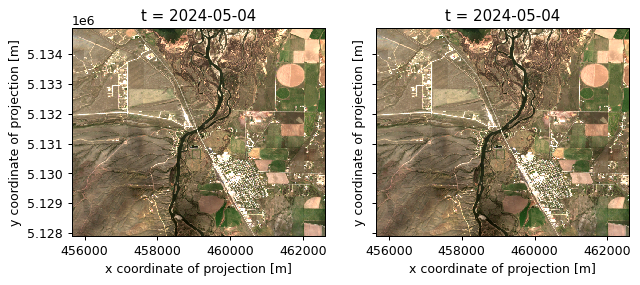

In [18]:
# Convert xarray DataSet to a (bands, t, x, y) DataArray
data = ds[["B04", "B03", "B02"]].to_array(dim="bands")
fig, axes = plt.subplots(ncols=2, figsize=(8, 3), dpi=90, sharey=True)
data[{"t": 0}].plot.imshow(vmin=0, vmax=2000, ax=axes[0])
data[{"t": -1}].plot.imshow(vmin=0, vmax=2000, ax=axes[1])

c:\Users\Ulli\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


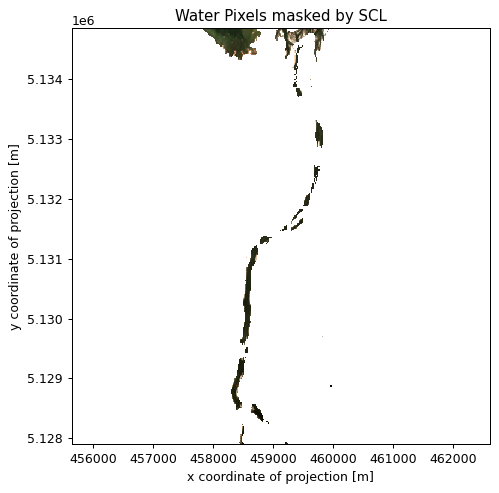

In [19]:
# keep the water pixels, where the SCL value is 6
cube_masked = ds.where(ds.SCL == 6)
# Select the RGB bands for plotting and convert to a DataArray
rgb_masked = cube_masked[["B04", "B03", "B02"]].to_array(dim="bands")
# Select the first time step for plotting
first_timestep_masked = rgb_masked.isel(t=0)

# Plot the result
fig, ax = plt.subplots(figsize=(6, 6), dpi=90)
first_timestep_masked.plot.imshow(vmin=0, vmax=2000, ax=ax, robust=True)
ax.set_title("Water Pixels masked by SCL")
plt.show()

https://open-eo.github.io/openeo-python-client/cookbook/spectral_indices.html#openeo.extra.spectral_indices.compute_index

https://awesome-ee-spectral-indices.readthedocs.io/en/latest/list.html#water

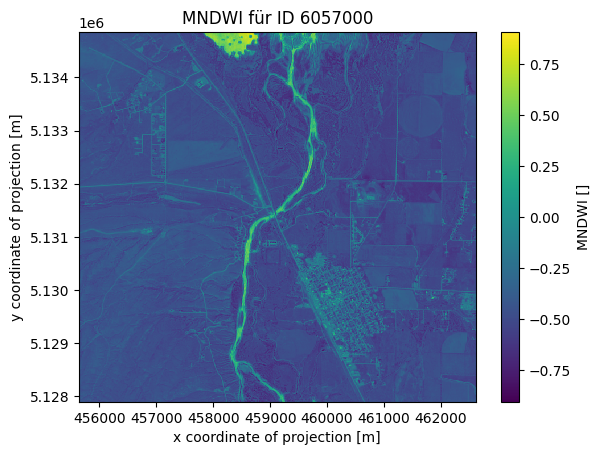

In [20]:
ds['MNDWI'].isel(t=0).plot(cmap='viridis')
plt.title(f"MNDWI für ID {id}")
plt.show()

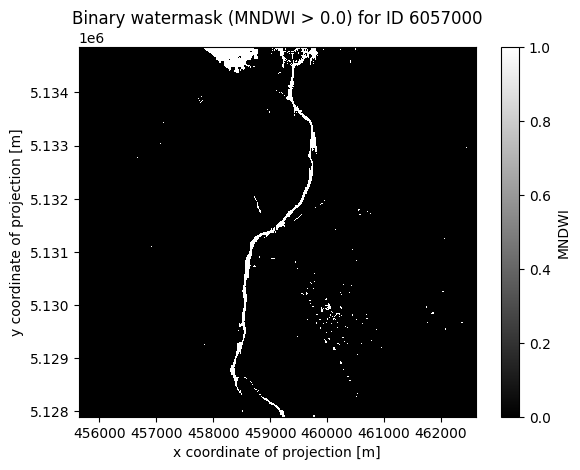

In [21]:
#get mndwi data for first time step
mndwi_data = ds['MNDWI'].isel(t=0)
# define threshold by 0 (water is positive, land is negative)
threshold = 0.0
#every pixel with mndwi value greater than threshold is water (true), else land (false)
water_mask = (mndwi_data > threshold)
# plot binary mask
water_mask.plot(cmap='gray')
plt.title(f"Binary watermask (MNDWI > {threshold}) for ID {id}")
plt.show()

Is there any mndwi-waterpixel? True
Is there any scl-waterpixel? True


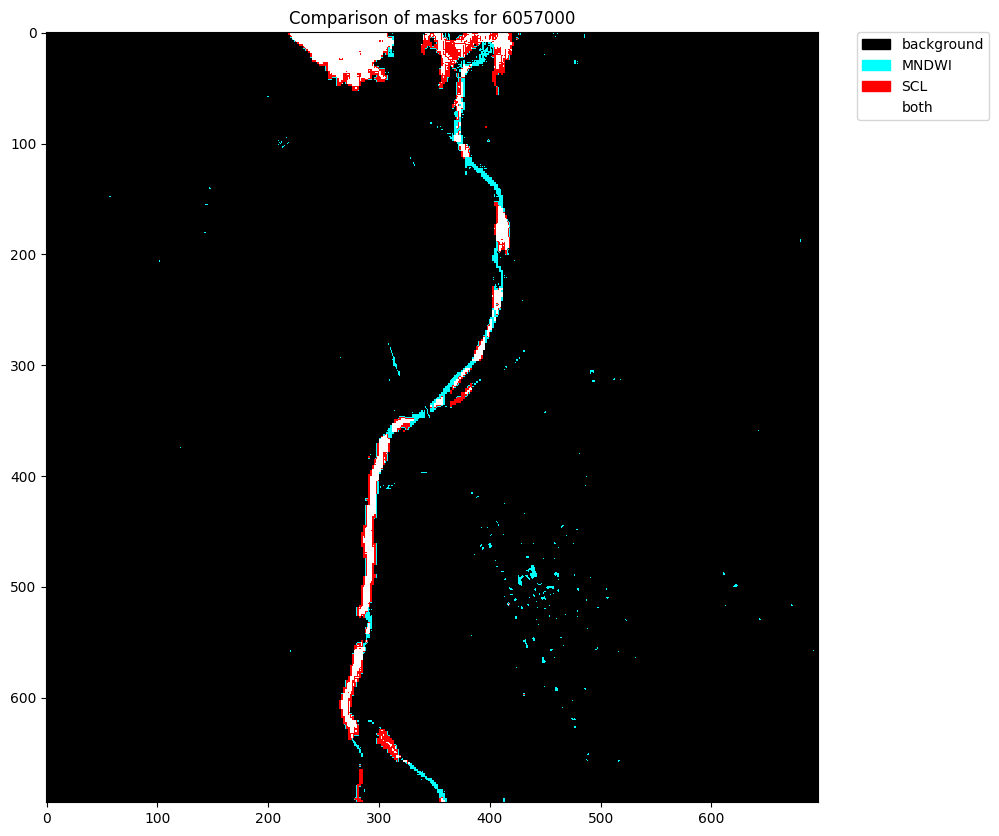

In [22]:
#compare MNDWI watermask with SCL watermask 
#get data for first time step
mndwi_mask = ds['MNDWI'].isel(t=0) > 0.0
scl_mask = ds['SCL'].isel(t=0) == 6

# check if there are any water pixels in each mask
mndwi_water_true = mndwi_mask.any()
scl_water_true = scl_mask.any()
print(f"Is there any mndwi-waterpixel? {mndwi_water_true.item()}")
print(f"Is there any scl-waterpixel? {scl_water_true.item()}")

# 2. create numerical comparison mask
# Values:
# 0: background
# 1: mndwi only
# 2: scl only
# 3: both
comparison_mask = np.zeros_like(mndwi_mask, dtype=int)
comparison_mask[mndwi_mask] = 1
comparison_mask[scl_mask] = 2
comparison_mask[mndwi_mask & scl_mask] = 3

# 3. Define colors and labels for the legend
cmap = mcolors.ListedColormap(['black', 'cyan', 'red', 'white'])
labels = {
    0: 'background',
    1: 'MNDWI',
    2: 'SCL',
    3: 'both'
}
patches = [mpatches.Patch(color=cmap.colors[i], label=labels[i]) for i in range(len(labels))]

# plot the mask with legend
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(comparison_mask, cmap=cmap)
ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_title(f"Comparison of masks for {id}")
plt.show()

Number of water pixels in combined mask: 12521


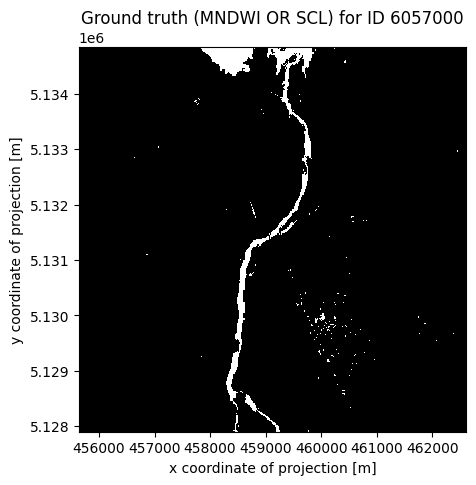

In [23]:
#combine both masks
combined_mask = (mndwi_mask | scl_mask)
water_pixel_count = combined_mask.sum().item()
print(f"Number of water pixels in combined mask: {water_pixel_count}")
# plot the combined mask
fig, ax = plt.subplots(figsize=(5, 5))
combined_mask.plot(ax=ax, cmap='gray', add_colorbar=False)
ax.set_title(f"Ground truth (MNDWI OR SCL) for ID {id}")
plt.show()

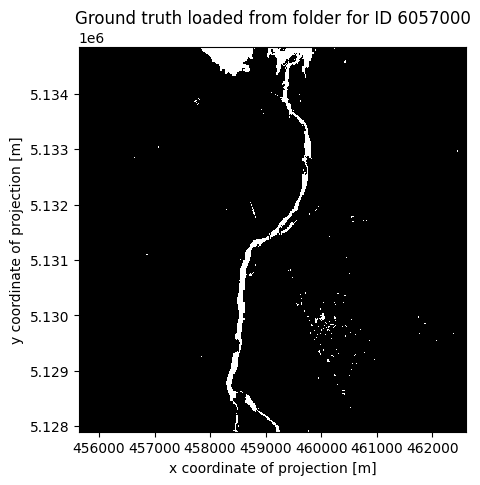

In [17]:
#get a sample of the mask_dataset
water_mask, water_mask_id, id_list_masks = mask_dataset[1]
water_mask = water_mask.to_array(dim="bands")
# plot the combined mask
fig, ax = plt.subplots(figsize=(5, 5))
water_mask.plot(ax=ax, cmap='gray', add_colorbar=False)
ax.set_title(f"Ground truth loaded from folder for ID {id}")
plt.show()

# 3. Fine-Tune DeepLabV3+

In [18]:
#imports
import torch
from PIL import Image
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset

In [22]:
# create training dataset
class TrainingDataset(Dataset):
    def __init__(self, sen2_dataset, mask_dataset):
        self.sentinel_data = sen2_dataset
        self.mask_data = mask_dataset
        # get valid ids, which has water masks
        self.valid_ids = self.mask_data.water_id
        # map valid ids to the gage_id in the sentinel dataset
        self.sen2_id_to_idx = [i for i, gage_id in enumerate(self.sentinel_data.IDs) if gage_id in self.valid_ids]

    #get len of valid ids   
    def __len__(self):
        return len(self.valid_ids)

    def __getitem__(self, idx):
         #get valid id and find in corresponding sentinel dataset
        gage_id = self.valid_ids[idx]
        sen2_idx = self.sen2_id_to_idx[gage_id]
       #get sentinel data and mask data
        ds, _, _ = self.sentinel_data[sen2_idx]
        water_mask, _ , _ = self.mask_data[idx]

        #get rgb data
        # Convert xarray DataSet to a (bands, t, x, y) DataArray
        rgb_data = ds[["B04", "B03", "B02"]].to_array(dim="bands").isel(t=0)
        image_numpy = rgb_data.to_numpy().astype('float32') / 10000.0
        image_numpy = image_numpy.transpose(1, 2, 0)  # Change to (H, W, C)

        #get ground truth water mask
        water_mask = water_mask.to_numpy().astype('int64') # Convert to numpy array (int for crossentropy loss)
        #print(water_mask.shape)

        # Define a fixed size for all images and masks
        target_size = (512, 512)

        #convert image to tensor
        preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(target_size), #bilinear interpolation for satellite image 
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])

        input_image = preprocess(image_numpy)
        #input_image = image.unsqueeze(0) # create a mini-batch as expected by the model
        
        mask_tensor = torch.from_numpy(water_mask).unsqueeze(0) # Add channel dim for resize
        mask_tensor = transforms.functional.resize(mask_tensor, target_size, interpolation=transforms.InterpolationMode.NEAREST).squeeze(0) #2 label - nearest neighbor interpolation for mask (every pixel get the value of the closest pixel)
        print(input_image.shape)
        print(mask_tensor.shape)
        sample = {'image' : input_image, 'mask': mask_tensor}

        return sample
    


In [23]:
train_data = TrainingDataset(sen2_dataset, mask_dataset)
train_loader = DataLoader(train_data, batch_size=2, shuffle=True) #stack data into batches of 2

In [24]:
train_data[0]

IndexError: list index out of range

In [63]:
#load pre-trained DeepLabV3 model for semantic segmentation
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)

Using cache found in C:\Users\Ulli/.cache\torch\hub\pytorch_vision_v0.10.0
c:\Users\Ulli\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Ulli\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [64]:
#modify classifier to output 2 classes (background and water)
#get last layer (layer 4)
model.classifier[4] = torch.nn.Conv2d(256, 2, kernel_size=(1, 1), stride=(1, 1))
# train the model
model.train()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [65]:
#define loss function and optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = torch.nn.CrossEntropyLoss()

#training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        images = batch['image']
        masks = batch['mask']
        
        # Forward pass
        outputs = model(images)['out']
        # Compute loss
        loss = criterion(outputs, masks)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print("Training complete.")
#model returns ordered dict with key 'out' containing the semantic masks

(695, 697, 3)
(695, 697)
torch.Size([3, 512, 512])
torch.Size([512, 512])
(696, 698, 3)
(696, 698)
torch.Size([3, 512, 512])
torch.Size([512, 512])
Epoch [1/5], Loss: 0.6673
(695, 697, 3)
(695, 697)
torch.Size([3, 512, 512])
torch.Size([512, 512])
(696, 698, 3)
(696, 698)
torch.Size([3, 512, 512])
torch.Size([512, 512])
Epoch [2/5], Loss: 0.6532
(695, 697, 3)
(695, 697)
torch.Size([3, 512, 512])
torch.Size([512, 512])
(696, 698, 3)
(696, 698)
torch.Size([3, 512, 512])
torch.Size([512, 512])
Epoch [3/5], Loss: 0.6222
(696, 698, 3)
(696, 698)
torch.Size([3, 512, 512])
torch.Size([512, 512])
(695, 697, 3)
(695, 697)
torch.Size([3, 512, 512])
torch.Size([512, 512])
Epoch [4/5], Loss: 0.5973
(695, 697, 3)
(695, 697)
torch.Size([3, 512, 512])
torch.Size([512, 512])
(696, 698, 3)
(696, 698)
torch.Size([3, 512, 512])
torch.Size([512, 512])
Epoch [5/5], Loss: 0.5761
Training complete.


In [ ]:
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
data = ds[["B04", "B03", "B02"]].to_array(dim="bands").isel(t=0) #select first time step
data_numpy = data.to_numpy().astype('float32') / 10000.0 # Scale to [0, 1] range, because tensor expect a specific range [normal: 0, 255] - Sentinel2 higher (0, 10000)
# Transpose dimensions from (C, H, W) to (H, W, C) for creating a tensor
data_numpy_transposed = data_numpy.transpose(1, 2, 0)
input_tensor = preprocess(data_numpy_transposed)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

In [36]:
with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

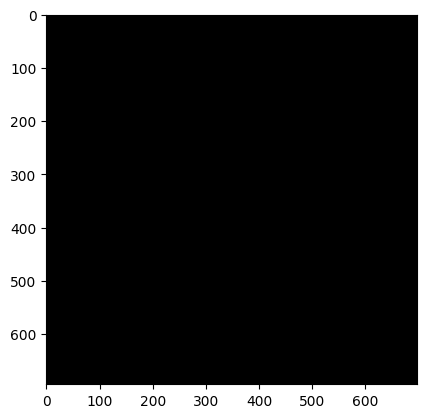

In [41]:
# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")
output_image_size = (data.shape[2], data.shape[1])
# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(output_image_size)
r.putpalette(colors)

plt.imshow(r)
plt.show()

# 4. Calculate river width 

# 5. Construct the cross-section